In [1]:
import pandas as pd
from rich import print

# must uninstall

#pip uninstall astropy
#conda uninstall pointpats

In [2]:
df = pd.read_csv("../../data/records_with_spatial_data.csv", usecols=["casenumber", "death_year", "composite_latitude", "composite_longitude", "xylazine_1", "xylazine_2", "fentanyl_1", "fentanyl_2"])
print(df.shape)
df = df.dropna(subset=["composite_latitude", "composite_longitude"])
print(df.shape)
# df = df[df["death_year"].isin([2014, 2015, 2016, 2017, 2018])]
print(df.shape)

(70226, 8)

(68112, 8)

(68112, 8)

In [3]:
def label_case_control(row: pd.Series) -> int | None:
    if row["xylazine_1"] == 1 or row["xylazine_2"] == 1:
        # case
        return 2
    elif row["fentanyl_1"] == 1 or row["fentanyl_2"] == 1:
        # control
        return 1
    else:
        # neither
        return None


df["case_control"] = df.apply(label_case_control, axis=1)
print(df.shape)
df.dropna(subset=["case_control"], inplace=True)
print(df.shape)
df.head()

(68112, 9)

(7366, 9)

,casenumber,composite_latitude,composite_longitude,fentanyl_1,fentanyl_2,xylazine_1,xylazine_2,death_year,case_control
114,ME2015-03553,41.849826,-87.705543,1.0,NaN,NaN,NaN,2015.0,1.0
130,ME2015-05252,41.910151,-87.707260,1.0,NaN,NaN,NaN,2015.0,1.0
162,ME2019-01301,41.931694,-87.708468,1.0,NaN,NaN,NaN,2019.0,1.0
371,ME2019-00863,41.970572,-87.763650,1.0,NaN,NaN,NaN,2019.0,1.0
399,ME2014-01540,41.760580,-87.614341,1.0,NaN,NaN,NaN,2014.0,1.0


In [4]:
df = pd.read_csv("./xylazine_matched_fentanyl.csv")
df.head()

,matchnumber,CaseIdentifier,age,race,gender,composite_longitude,composite_latitude,group,death_year,case,distance,weights
0,1,33543,44,White,Male,-87.738374,41.881506,xylazine,2020,1,0.046608,1.0
1,1,32929,44,White,Male,-87.687850,41.789446,fentanyl,2020,0,0.046608,1.0
2,1,33063,44,White,Male,-87.680723,41.856964,fentanyl,2020,0,0.046608,1.0
3,1,34964,44,White,Male,-87.803437,41.886812,fentanyl,2020,0,0.046608,1.0
4,2,33563,41,White,Male,-87.646388,41.889154,xylazine,2020,1,0.046163,1.0


In [6]:
df.case.value_counts()

0    816
1    272
Name: case, dtype: int64

In [7]:
from shapely.geometry import Point
points = [Point(x, y) for (x, y) in df[["composite_longitude", "composite_latitude"]].to_numpy()]
points[:3]

In [8]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=points, crs="EPSG:4326").to_crs("+proj=merc +lat_ts=41.9")
# gdf = gpd.GeoDataFrame(df, geometry=points, crs="EPSG:4326").to_crs("+proj=aea +lat_1=40 +lat_2=44")
gdf.head()


,matchnumber,CaseIdentifier,age,race,gender,composite_longitude,composite_latitude,group,death_year,case,distance,weights,geometry
0,1,33543,44,White,Male,-87.738374,41.881506,xylazine,2020,1,0.046608,1.0,POINT (-7280561.195 3812635.988)
1,1,32929,44,White,Male,-87.687850,41.789446,fentanyl,2020,0,0.046608,1.0,POINT (-7276368.653 3802421.051)
2,1,33063,44,White,Male,-87.680723,41.856964,fentanyl,2020,0,0.046608,1.0,POINT (-7275777.220 3809911.343)
3,1,34964,44,White,Male,-87.803437,41.886812,fentanyl,2020,0,0.046608,1.0,POINT (-7285960.068 3813225.145)
4,2,33563,41,White,Male,-87.646388,41.889154,xylazine,2020,1,0.046163,1.0,POINT (-7272928.117 3813485.185)


<AxesSubplot:>

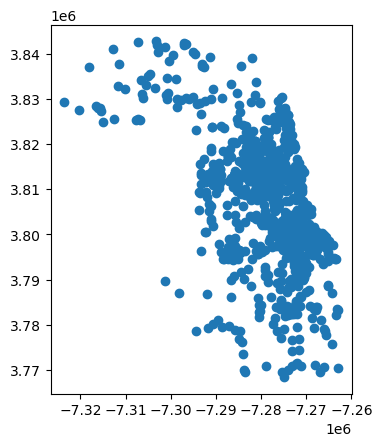

In [9]:
gdf.plot()

In [10]:
gdf['x_coord'] = gdf['geometry'].apply(lambda x: x.x)
gdf['y_coord'] = gdf['geometry'].apply(lambda x: x.y)
gdf.head()

,matchnumber,CaseIdentifier,age,race,gender,composite_longitude,composite_latitude,group,death_year,case,distance,weights,geometry,x_coord,y_coord
0,1,33543,44,White,Male,-87.738374,41.881506,xylazine,2020,1,0.046608,1.0,POINT (-7280561.195 3812635.988),-7.280561e+06,3.812636e+06
1,1,32929,44,White,Male,-87.687850,41.789446,fentanyl,2020,0,0.046608,1.0,POINT (-7276368.653 3802421.051),-7.276369e+06,3.802421e+06
2,1,33063,44,White,Male,-87.680723,41.856964,fentanyl,2020,0,0.046608,1.0,POINT (-7275777.220 3809911.343),-7.275777e+06,3.809911e+06
3,1,34964,44,White,Male,-87.803437,41.886812,fentanyl,2020,0,0.046608,1.0,POINT (-7285960.068 3813225.145),-7.285960e+06,3.813225e+06
4,2,33563,41,White,Male,-87.646388,41.889154,xylazine,2020,1,0.046163,1.0,POINT (-7272928.117 3813485.185),-7.272928e+06,3.813485e+06


In [11]:
# dropcols = ["geometry", "fentanyl_1", "fentanyl_2", "latitude", "longitude", "nonfentanyl_opioid_tag", "casenumber"]
dropcols = ["geometry"]
gdf.drop(columns=dropcols)

,matchnumber,CaseIdentifier,age,race,gender,composite_longitude,composite_latitude,group,death_year,case,distance,weights,x_coord,y_coord
0,1,33543,44,White,Male,-87.738374,41.881506,xylazine,2020,1,0.046608,1.0,-7.280561e+06,3.812636e+06
1,1,32929,44,White,Male,-87.687850,41.789446,fentanyl,2020,0,0.046608,1.0,-7.276369e+06,3.802421e+06
2,1,33063,44,White,Male,-87.680723,41.856964,fentanyl,2020,0,0.046608,1.0,-7.275777e+06,3.809911e+06
3,1,34964,44,White,Male,-87.803437,41.886812,fentanyl,2020,0,0.046608,1.0,-7.285960e+06,3.813225e+06
4,2,33563,41,White,Male,-87.646388,41.889154,xylazine,2020,1,0.046163,1.0,-7.272928e+06,3.813485e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,271,40872,27,Black,Male,-87.584393,41.616488,fentanyl,2020,0,0.034061,1.0,-7.267784e+06,3.783270e+06
1084,272,33086,41,White,Male,-87.627033,41.869145,xylazine,2020,1,0.046163,1.0,-7.271322e+06,3.811263e+06
1085,272,32881,41,White,Male,-87.731626,41.916511,fentanyl,2020,0,0.046163,1.0,-7.280001e+06,3.816524e+06
1086,272,33603,41,White,Male,-87.708104,41.925411,fentanyl,2020,0,0.046163,1.0,-7.278049e+06,3.817513e+06


In [12]:
gdf.drop(columns=dropcols).to_csv("projected.csv", index=False)

In [7]:
import geopandas as gpd

gdf = gpd.GeoSeries(points, crs="EPSG:4326")
gdf.head()

0    POINT (-87.70554 41.84983)
1    POINT (-87.70847 41.93169)
2    POINT (-87.76365 41.97057)
3    POINT (-87.61434 41.76058)
4    POINT (-87.68611 41.81900)
dtype: geometry

<AxesSubplot:>

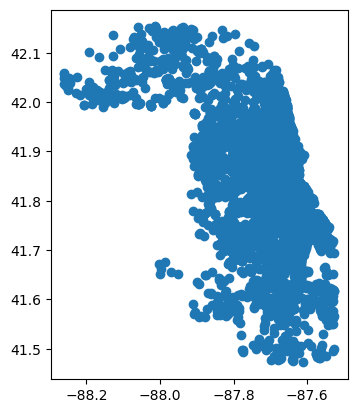

In [8]:
gdf.plot()

<AxesSubplot:>

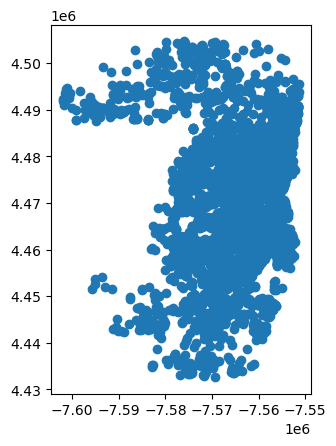

In [9]:
gdf_flat = gdf.to_crs("+proj=robin")
gdf_flat.plot()

In [10]:
gdf_flat.crs

<Derived Projected CRS: +proj=robin +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Robinson
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
import numpy as np

points = np.array([[p.x, p.y] for p in gdf_flat.values])
points

array([[-7562101.48899385,  4472593.80664576],
       [-7558947.3083439 ,  4481263.12592453],
       [-7562081.35730384,  4485379.61232488],
       ...,
       [-7554441.05671135,  4476693.90875984],
       [-7557019.05258271,  4478885.99031126],
       [-7563043.85661582,  4463683.64460387]])

In [12]:
df.values[:5]

array([[nan, nan, 41.88947682, -87.61545112, 'control'],
       [nan, nan, 41.50733584, -87.62322044, 'control'],
       [nan, nan, 41.77362004, -87.84976596999999, 'control'],
       [nan, nan, 41.75286378, -87.6432531, 'control'],
       [nan, nan, 41.68470668, -87.63151396, 'control']], dtype=object)

In [13]:
from pointpats import ripley

k_test = ripley.k_test(coordinates=points, keep_simulations=True, n_simulations=5)
k_test

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(k_test.support, k_test.simulations.T, color='k', alpha=.01)
plt.plot(k_test.support, k_test.statistic, color='orangered')

plt.scatter(k_test.support, k_test.statistic, 
            cmap='viridis', c=k_test.pvalue < .05,
            zorder=4 # make sure they plot on top
)

plt.xlabel('Distance')
plt.ylabel('K Function')
plt.title('K Function Plot')
plt.show()

--

KeyboardInterrupt: 

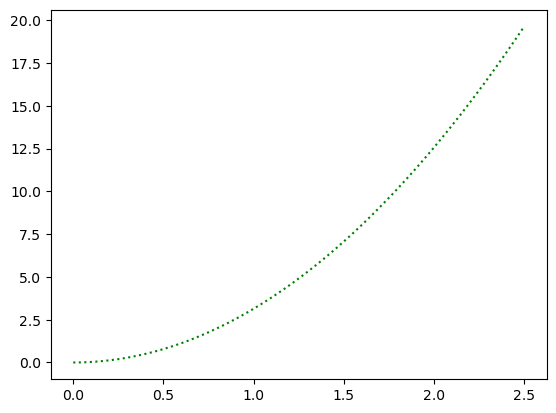

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.stats import RipleysKEstimator

# rng = np.random.default_rng()
# z = rng.uniform(low=5, high=10, size=(100, 2))
Kest = RipleysKEstimator(area=25, x_max=10, y_max=10, x_min=5, y_min=5)

r = np.linspace(0, 2.5, 100)
plt.plot(r, Kest.poisson(r), color='green', ls=':', label=r'$K_{pois}$')
print('--')
plt.plot(r, Kest.evaluate(data=points, radii=r, mode='none'), color='red', ls='--',
        label=r'$K_{un}$')
print('--')
plt.plot(r, Kest.evaluate(data=points, radii=r, mode='translation'), color='black',
        label=r'$K_{trans}$')
print('--')
plt.plot(r, Kest.evaluate(data=points, radii=r, mode='ohser'), color='blue', ls='-.',
        label=r'$K_{ohser}$')
print('--')
plt.plot(r, Kest.evaluate(data=points, radii=r, mode='var-width'), color='green',
        label=r'$K_{var-width}$')
print('--')
plt.plot(r, Kest.evaluate(data=points, radii=r, mode='ripley'), color='yellow',
        label=r'$K_{ripley}$')
print('--')
plt.legend()

In [15]:
r

array([0.        , 0.02525253, 0.05050505, 0.07575758, 0.1010101 ,
       0.12626263, 0.15151515, 0.17676768, 0.2020202 , 0.22727273,
       0.25252525, 0.27777778, 0.3030303 , 0.32828283, 0.35353535,
       0.37878788, 0.4040404 , 0.42929293, 0.45454545, 0.47979798,
       0.50505051, 0.53030303, 0.55555556, 0.58080808, 0.60606061,
       0.63131313, 0.65656566, 0.68181818, 0.70707071, 0.73232323,
       0.75757576, 0.78282828, 0.80808081, 0.83333333, 0.85858586,
       0.88383838, 0.90909091, 0.93434343, 0.95959596, 0.98484848,
       1.01010101, 1.03535354, 1.06060606, 1.08585859, 1.11111111,
       1.13636364, 1.16161616, 1.18686869, 1.21212121, 1.23737374,
       1.26262626, 1.28787879, 1.31313131, 1.33838384, 1.36363636,
       1.38888889, 1.41414141, 1.43939394, 1.46464646, 1.48989899,
       1.51515152, 1.54040404, 1.56565657, 1.59090909, 1.61616162,
       1.64141414, 1.66666667, 1.69191919, 1.71717172, 1.74242424,
       1.76767677, 1.79292929, 1.81818182, 1.84343434, 1.86868